In [36]:
import pandas as pd
import datetime as dt
import numpy as np
from pandas.plotting import scatter_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

pd.set_option('display.max_columns', None)

In [3]:
# Set data path
data_path = '../data/interim/'

# Set constants
a = "Activities"
br = "Breating Rate"
hrv = "Heart Rate Variability"
skin = "Skin Temp"
gs = "General Sleep"
sl = "Sleep Levels"
gf = "Google Form"
mfp = "myFitnessPal"
stress = "Stress"


# Read Data

In [4]:
"""
DataManager Class

Attributes:
    - activities_df: DataFrame containing activity-related data from 'initial_clean_activities.csv'.
    - br_df: DataFrame containing breath rate data from 'initial_clean_br.csv'.
    - hrv_df: DataFrame containing heart rate variability data from 'initial_clean_hrv.csv'.
    - skin_df: DataFrame containing skin temperature data from 'initial_clean_tempSkin.csv'.
    - sleep_levels_df: DataFrame containing detailed sleep cycle data from 'initial_clean_sleep_levels.csv'.
    - sleep_gen_df: DataFrame containing general sleep data from 'initial_clean_sleep.csv'.
    - form_df: DataFrame containing user form data from 'initial_clean_gf.csv'.
    - mfp_df: DataFrame containing MyFitnessPal data from 'initial_clean_mfp.csv'.
    - stress_df: DataFrame containing stress score data from 'stress_score.csv'.
    - all_dfs: A dictionary mapping unique keys to the corresponding DataFrames for centralized access:
        - 'a': Activities DataFrame.
        - 'br': Breath rate DataFrame.
        - 'hrv': Heart rate variability DataFrame.
        - 'skin': Skin temperature DataFrame.
        - 'gs': General sleep DataFrame.
        - 'sl': Sleep levels DataFrame.
        - 'gf': Form DataFrame.
        - 'mfp': MyFitnessPal DataFrame.
        - 'stress': Stress score DataFrame.

Methods:
    - __init__(self, data_path):
        Initializes the `DataManager` instance by loading CSV files into corresponding DataFrames.

    - get_df(self, key):
        Retrieves a DataFrame from `all_dfs` based on the given key.
        Parameters:
            - key (str): The key representing the desired DataFrame.
        Returns:
            - DataFrame corresponding to the given key.
        Raises:
            - KeyError: If the key is not found in `all_dfs`.

    - update_df(self, key, new_df):
        Updates a specific DataFrame and ensures consistency in `all_dfs`.
        Parameters:
            - key (str): The key representing the DataFrame to update.
            - new_df (DataFrame): The updated DataFrame.
        Returns:
            - The updated DataFrame.
        Raises:
            - KeyError: If the key is not found in `all_dfs`.

    - __update_all_dfs(self):
        A private method to refresh the `all_dfs` dictionary after updates.

    - update_all_dfs(self, adfs):
        Updates all DataFrames in the `all_dfs` dictionary with a new set of DataFrames.
        Parameters:
            - adfs (dict): A dictionary containing the new DataFrames.
        Returns:
            - The updated `all_dfs` dictionary.
        Raises:
            - ValueError: If the number of DataFrames in `adfs` does not match `all_dfs`.
            - KeyError: If the keys in `adfs` do not match the keys in `all_dfs`.

    - get_dfs_attr_name(self, key):
        Retrieves the attribute name of a DataFrame based on the given key.
        Parameters:
            - key (str): The key representing the desired DataFrame.
        Returns:
            - The attribute name as a string, or None if the key is invalid.
"""

class DataManager:
    def __init__(self, data_path):
        self.activities_df = pd.read_csv(data_path + 'initial_clean_activities.csv')
        self.br_df = pd.read_csv(data_path + 'initial_clean_br.csv')
        self.hrv_df = pd.read_csv(data_path + 'initial_clean_hrv.csv')
        self.skin_df = pd.read_csv(data_path + 'initial_clean_tempSkin.csv')
        self.sleep_levels_df = pd.read_csv(data_path + 'intial_clean_sleep_levels.csv')
        self.sleep_gen_df = pd.read_csv(data_path + 'initial_clean_sleep.csv')
        self.form_df = pd.read_csv(data_path + 'initial_clean_gf.csv')
        self.mfp_df = pd.read_csv(data_path + 'initial_clean_mfp.csv')
        self.stress_df = pd.read_csv(data_path + 'stress_score.csv')
        
        self.all_dfs = {
            a : self.activities_df,
            br : self.br_df,
            hrv: self.hrv_df,
            skin: self.skin_df,
            gs: self.sleep_gen_df,
            sl : self.sleep_levels_df,
            gf: self.form_df,
            mfp: self.mfp_df,
            stress : self.stress_df,
        }
    
    def get_df(self, key):
        #Check if key returns a non None value
        if self.get_dfs_attr_name(key):

            #return all_dfs[key] since we know that key is valid
            return self.all_dfs[key]
        else:
            raise KeyError(f"Key '{key}' not found in DataManager.")
    
    def update_df(self, key, new_df):
        if self.get_dfs_attr_name(key):
            
            attr_name = self.get_dfs_attr_name(key)
            if hasattr(self, attr_name):
                setattr(self, attr_name, new_df)
                self.__update_all_dfs()
        else:
            raise KeyError(f"Key '{key}' not found in DataManager.")
        
        return new_df
    
    def __update_all_dfs(self):
        self.all_dfs = {
            a : self.activities_df,
            br : self.br_df,
            hrv: self.hrv_df,
            skin: self.skin_df,
            gs: self.sleep_gen_df,
            sl : self.sleep_levels_df,
            gf: self.form_df,
            mfp: self.mfp_df,
            stress : self.stress_df,
        }

    def update_all_dfs(self, adfs):
        if len(self.all_dfs) != len(adfs):
            raise ValueError("Wrong amounts of dfs")
        
        if self.all_dfs.keys() != adfs.keys():
            raise KeyError("Wrong set of keys to map")
        
        for key, value in adfs.items():
            self.update_df(key, value)

        return self.all_dfs
        

    def get_dfs_attr_name(self, key):
        dfs_list = {
            a : "activities_df",
            br : "br_df",
            hrv: "hrv_df",
            skin: "skin_df",
            gs: "sleep_gen_df",
            sl : "sleep_levels_df",
            gf: "form_df",
            mfp: "mfp_df",
            stress : "stress_df",
        }

        return dfs_list.get(key, None)

    

data = DataManager(data_path)

activities_df = data.get_df(a)
br_df = data.get_df(br)
hrv_df = data.get_df(hrv)
skin_df = data.get_df(skin)
sleep_gen_df = data.get_df(gs)
sleep_levels_df = data.get_df(sl)
form_df = data.get_df(gf)
mfp_df = data.get_df(mfp)
stress_df = data.get_df(stress)






# Basic Preprocessing

In [5]:
# Limit general sleep dataframe to main sleeping sessions (rid of naps)
sleep_gen_df = sleep_gen_df[sleep_gen_df['isMainSleep']]
sleep_gen_df = data.update_df(gs, sleep_gen_df)

# Using sleep gen df as a reference, keep sleep level records of only main sleeping sessions 
sleep_levels_df = sleep_levels_df[sleep_levels_df["sleep_id"].isin(set(sleep_gen_df["sleep_id"]))]
sleep_levels_df = data.update_df(sl, sleep_levels_df)
# Drop columns since only one instance was recorded in them
form_df.drop(columns=['stress_responsiveness', 'stress_exertion', 'stress_sleep', 'stress_mgmt_score'], inplace=True)

# Get rid of data points where calculations of stress scores was lost, in this case the missing values provide no value
stress_df = stress_df[stress_df['CALCULATION_FAILED'] == False]
stress_df = data.update_df(stress, stress_df)

In [6]:
for key, df in data.all_dfs.items():
    
    for col in df.columns:
        if re.search("date", col, re.IGNORECASE):
            print(f"In {key}, date column(s) is: {col}")
            print(f"Example of column format: {df[col].iloc[0]}")
            print()

print("In Activities data, date column is: startTime")
print(f"Example of column format: {(activities_df['startTime'].iloc[0])}")


In Breating Rate, date column(s) is: dateTime
Example of column format: 2023-11-23

In Heart Rate Variability, date column(s) is: dateTime
Example of column format: 2023-11-23

In Skin Temp, date column(s) is: dateTime
Example of column format: 2023-11-26

In General Sleep, date column(s) is: dateOfSleep
Example of column format: 2023-11-23

In General Sleep, date column(s) is: datetime_key
Example of column format: 2023-11-23T12:51:00

In Sleep Levels, date column(s) is: dateTime
Example of column format: 2023-11-23T02:29:30.000

In Google Form, date column(s) is: date
Example of column format: 7/23/2024

In myFitnessPal, date column(s) is: date
Example of column format: 2024-04-15

In Stress, date column(s) is: DATE
Example of column format: 2023-11-23T00:00:00

In Stress, date column(s) is: UPDATED_AT
Example of column format: 2023-11-23T19:51:56.998

In Activities data, date column is: startTime
Example of column format: 2023-11-25T18:59:25.000-05:00


In [7]:
list_of_date_cols = ["date", "DATE", "dateTime", "startTime"]

all_dfs = data.all_dfs

for key, df in all_dfs.items():
    if key == a:
        all_dfs[key]["normalized_datetime"] = pd.to_datetime(all_dfs[key]["startTime"], errors="coerce", utc=True)
        all_dfs[key]["normalized_datetime"] = all_dfs[key]["normalized_datetime"].dt.tz_convert("America/New_York")
        continue
    for col in df.columns:
        if col in list_of_date_cols:
            print(key)
            all_dfs[key]["normalized_datetime"] = pd.to_datetime(all_dfs[key][col], errors="coerce")
        
#print(all_dfs)
all_dfs = data.update_all_dfs(all_dfs)
    #print(all_dfs.head())

Breating Rate
Heart Rate Variability
Skin Temp
General Sleep
Sleep Levels
Google Form
myFitnessPal
Stress


In [8]:
# Next step is to replace google form answers with numbers for easier analysis

form_df.head()

,timestamp,date,last_sleep_feel,last_sleep_score,daily_particular_qualities,day_feel,ef_status,ef_description,dissatisfied_status,normalized_datetime
0,7/23/2024 23:22:15,7/23/2024,Bad,NaN,"Mentally Tired, Physically Tired",Good,No,NaN,"None / little work done., Tired.",2024-07-23
1,7/24/2024 23:06:55,7/24/2024,Very Good,NaN,Felt Great Today,Very Good,Yes,Dad made me run errands all day.,None / little work done.,2024-07-24
2,7/26/2024 9:47:16,7/25/2024,Mid,NaN,Normal,Good,Yes,Dad,None / little work done.,2024-07-25
3,7/26/2024 22:51:08,7/26/2024,Very Good,NaN,Felt Great Today,Very Good,No,NaN,Not dissatisfied with anything.,2024-07-26
4,7/29/2024 0:31:44,7/27/2024,Good,NaN,Normal,Good,No,A lot of work to do.,None / little physical activity done.,2024-07-27


In [9]:
form_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   timestamp                   51 non-null     object        
 1   date                        51 non-null     object        
 2   last_sleep_feel             44 non-null     object        
 3   last_sleep_score            37 non-null     float64       
 4   daily_particular_qualities  44 non-null     object        
 5   day_feel                    44 non-null     object        
 6   ef_status                   44 non-null     object        
 7   ef_description              14 non-null     object        
 8   dissatisfied_status         43 non-null     object        
 9   normalized_datetime         51 non-null     datetime64[ns]
dtypes: datetime64[ns](1), float64(1), object(8)
memory usage: 4.1+ KB


In [10]:
for col in form_df.columns[2:]:
    if form_df[col].dtype == 'object':
        print(col)
        print(form_df[col].value_counts())
        print()

last_sleep_feel
last_sleep_feel
Mid          16
Bad          12
Good          8
Very Good     5
Very Bad      3
Name: count, dtype: int64

daily_particular_qualities
daily_particular_qualities
Mentally Tired, Physically Tired                               11
Mentally Tired, Physically Tired, Low Motivation                8
Normal                                                          6
Felt Great Today                                                3
Normal, Low Motivation                                          3
Normal, Felt Great Today                                        3
Mentally Tired, Physically Tired, Felt Sick                     2
Mentally Tired, Physically Tired, Low Motivation, Felt Sick     2
Mentally Tired                                                  1
Low Motivation                                                  1
Mentally Tired, Normal                                          1
Normal, Low Motivation, Felt Sick                               1
Normal, Felt Si

In [11]:
last_sleep_feel_mapping = {
    'Very Bad': -2,
    'Bad': -1,
    'Mid': 0,
    'Good': 1,
    'Very Good': 2
}

day_feel_mapping = {
    'Very Good': 2,
    'Good': 1,
    'Mid': 0,
    'Bad': -1,
    'Very Bad' : -2
}

daily_particular_qualities_mapping = {
    'Mentally Tired': -1,
    'Physically Tired': -1,
    'Low Motivation': -1,
    'Normal': 0,
    'Felt Great Today': 2,
    'Felt Sick': -3,
    'Stressed': -2
}

dissatisfied_sentiment_mapping = {
    'None / little work done.': -1,
    'None / little physical activity done.': -1,
    'Tired.': -1,
    'Not dissatisfied with anything.': 1,
    'Did not achieve daily goal.' : -1,
    'Did not have fun / do hobbies.' : -1,
}

In [14]:
# Columns to transform
col_to_t = {'last_sleep_feel' : last_sleep_feel_mapping , 'daily_particular_qualities' : daily_particular_qualities_mapping, 'day_feel': daily_particular_qualities_mapping, 'dissatisfied_status': dissatisfied_sentiment_mapping}

#Convert column to boolean for easier processing
form_df["ef_status"] = form_df["ef_status"].map({'Yes': True, 'No': False}).fillna(False)

# Map string responses to numbers in a new column, as well as create a column that is the sum aggregate of that for a high level look
for col, dic in col_to_t.items():
    form_df[col + "_num"] = (
        form_df[col]
        .fillna("")  
        .apply(lambda x: x.split(",") if isinstance(x, str) else [])  
        .apply(lambda x: [dic[val.strip()] for val in x if val.strip() in dic])
    )
    form_df[col + "_agg"] = form_df[col + "_num"].apply(sum) 
    

C:\Users\Saatvik Sandal\AppData\Local\Temp\ipykernel_34580\402653842.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  form_df["ef_status"] = form_df["ef_status"].map({'Yes': True, 'No': False}).fillna(False)


In [17]:
form_df = data.update_df(gf, form_df)

# Start Activities Related Analysis

## 1. Quantify hrz_outofzone_calories correlation with steps, duiration and activeduration

In [22]:
temp_study = activities_df[['activityName', 'calories', 'steps', 'duration', 'activeDuration', 'hrz_OutofRange_calories', 'hrz_OutofRange_minutes']]
temp_study_num = temp_study.iloc[:,1:]
temp_study

,activityName,calories,steps,duration,activeDuration,hrz_OutofRange_calories,hrz_OutofRange_minutes
0,Walk,562,4874.0,3840000,3840000,10.698376,0
1,Walk,125,1142.0,1024000,1024000,40.445080,4
2,Run,65,536.0,552000,546000,15.264756,3
3,Walk,186,1615.0,1229000,1229000,11.481184,0
4,Walk,135,1405.0,972000,972000,54.927028,6
...,...,...,...,...,...,...,...
437,Walk,121,1103.0,1077000,1077000,105.548058,14
438,Walk,142,1468.0,1024000,1024000,8.224524,1
439,Walk,137,1618.0,1074000,1074000,114.520266,13
440,Walk,99,1167.0,972000,972000,92.962044,13


f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
f:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_

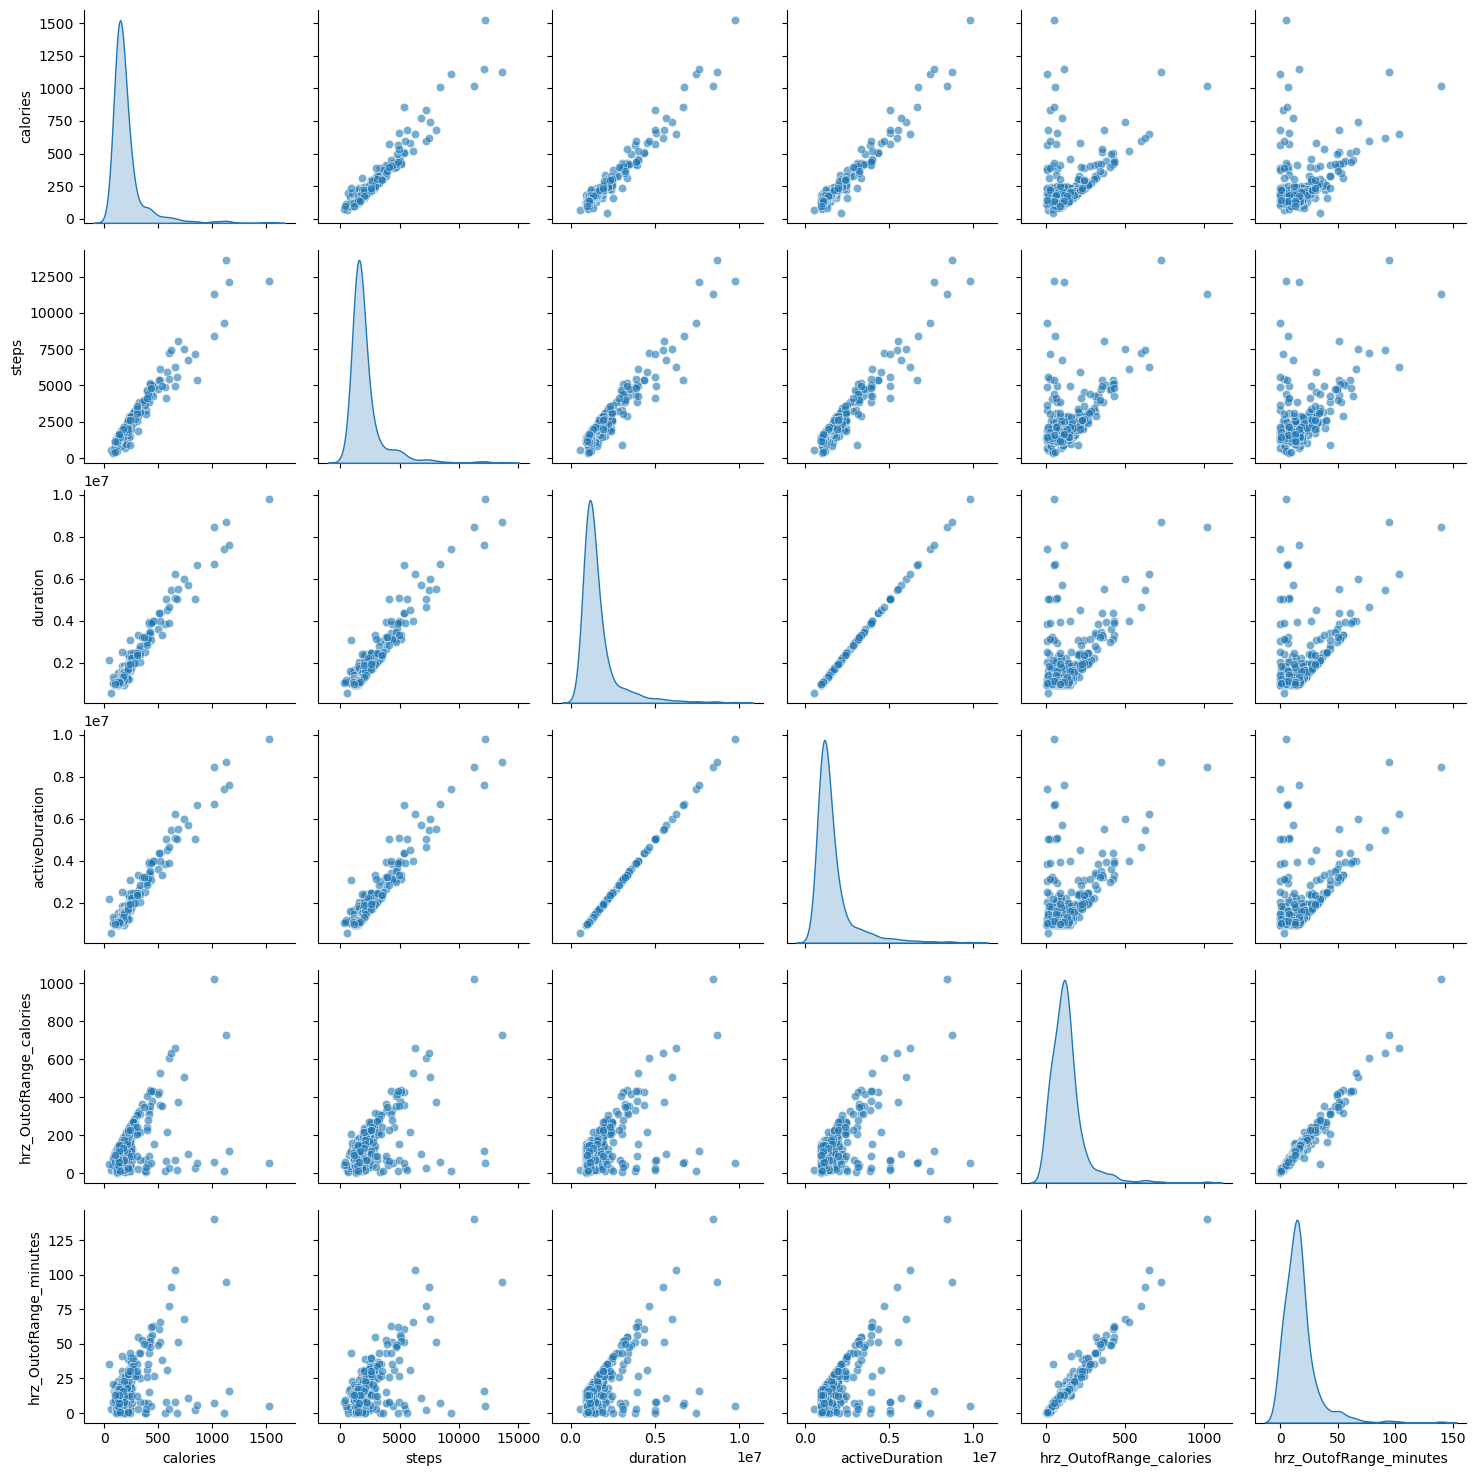

In [23]:
# Generate a scatterplot matrix to quickly visualize relationships 

sns.pairplot(temp_study_num, diag_kind="kde", plot_kws={"alpha":0.6})
plt.show()

In [24]:
temp_study_num.corr()

,calories,steps,duration,activeDuration,hrz_OutofRange_calories,hrz_OutofRange_minutes
calories,1.000000,0.965622,0.976608,0.976608,0.445731,0.436019
steps,0.965622,1.000000,0.958211,0.958213,0.570027,0.563086
duration,0.976608,0.958211,1.000000,1.000000,0.529846,0.548520
activeDuration,0.976608,0.958213,1.000000,1.000000,0.529853,0.548525
hrz_OutofRange_calories,0.445731,0.570027,0.529846,0.529853,1.000000,0.980442
hrz_OutofRange_minutes,0.436019,0.563086,0.548520,0.548525,0.980442,1.000000


We see that outofrange calories and minutes have a 0.98 pearsons correlation coefficient. Going forward I will use minutes as the base.
The similarity between duration and activeDuration is too much, they are nearly identical, so I will remove those too. There are other co-linear relationships, but as for minutes to the objects of study, the coeffecients are not that strong, the highest being steps with 0.5.

Curious to see what the distribution of activity types (names) are.

In [26]:
temp_study_num.drop(columns=['hrz_OutofRange_calories', 'activeDuration'], inplace=True)
temp_study.drop(columns=['hrz_OutofRange_calories', 'activeDuration'], inplace=True)



C:\Users\Saatvik Sandal\AppData\Local\Temp\ipykernel_34580\1419077043.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_study.drop(columns=['hrz_OutofRange_calories', 'activeDuration'], inplace=True)


C:\Users\Saatvik Sandal\AppData\Local\Temp\ipykernel_34580\3482251561.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_study["activity_num"] = temp_study["activityName"].map(activity_mapping)


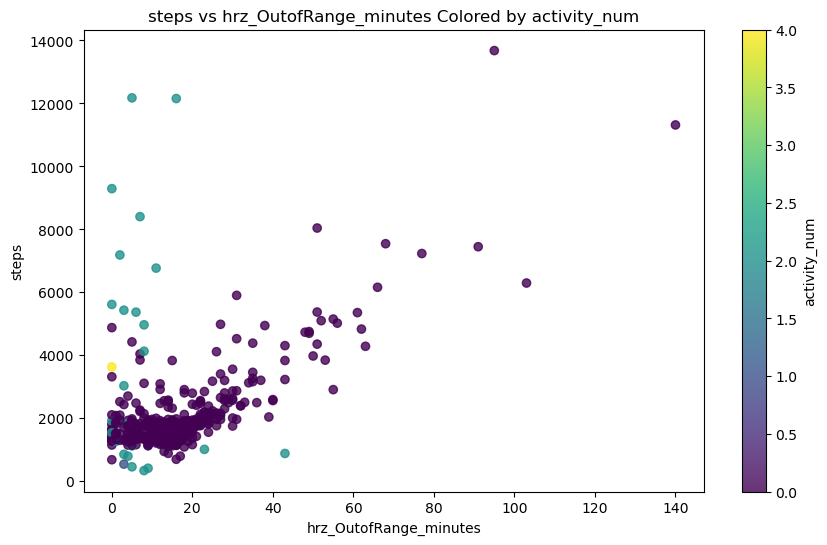

C:\Users\Saatvik Sandal\AppData\Local\Temp\ipykernel_34580\3482251561.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_study["activity_num"] = temp_study["activityName"].map(activity_mapping)


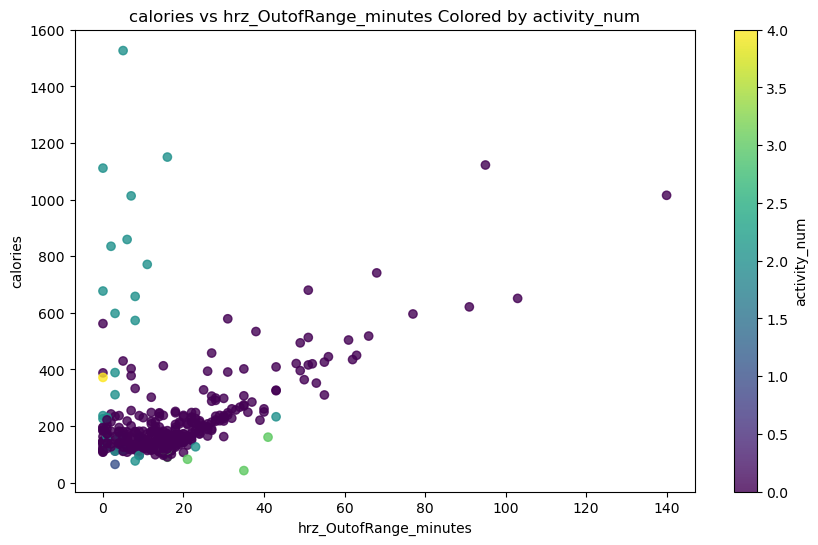

C:\Users\Saatvik Sandal\AppData\Local\Temp\ipykernel_34580\3482251561.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_study["activity_num"] = temp_study["activityName"].map(activity_mapping)


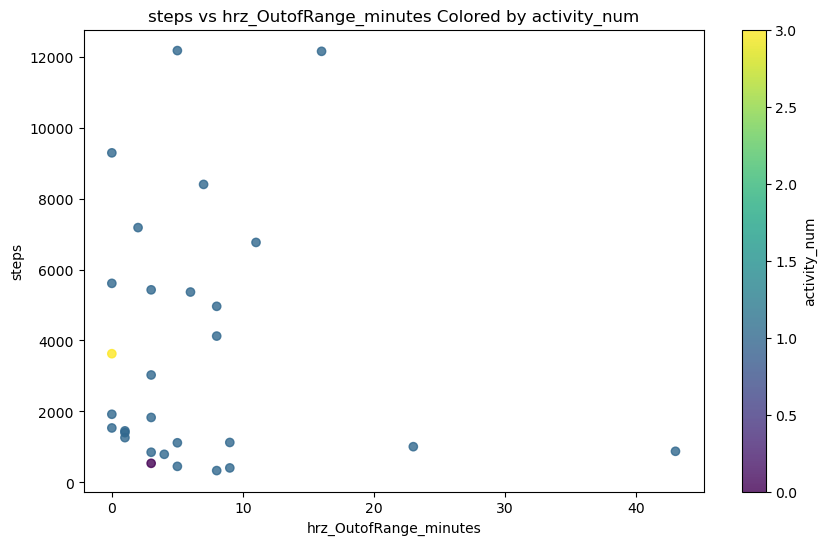

C:\Users\Saatvik Sandal\AppData\Local\Temp\ipykernel_34580\3482251561.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp_study["activity_num"] = temp_study["activityName"].map(activity_mapping)


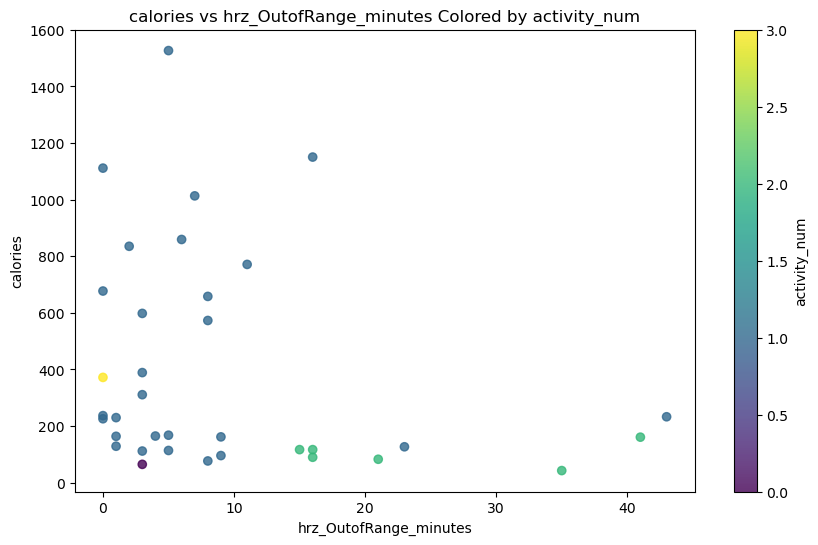

In [32]:


def scatter_plot_activity_task_one(temp_study, x_col, y_col, color_col):

    activity_mapping = {activity: i for i, activity in enumerate(temp_study["activityName"].unique())}
    temp_study["activity_num"] = temp_study["activityName"].map(activity_mapping)

    plt.figure(figsize=(10, 6))
    scatter = plt.scatter(
        temp_study[x_col],
        temp_study[y_col],
        c=temp_study[color_col],  # Color points by the values in the third column
        cmap="viridis",  # Use a colormap (e.g., 'viridis', 'coolwarm', etc.)
        alpha=0.8,  # Transparency of points
    )
    plt.colorbar(scatter, label=color_col)  # Add a colorbar
    plt.title(f"{y_col} vs {x_col} Colored by {color_col}")
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.show()

x_col = 'hrz_OutofRange_minutes'
y_col = 'steps'
y_col2 = 'calories'
color_col = 'activity_num'

scatter_plot_activity_task_one(temp_study, x_col, y_col, color_col)
scatter_plot_activity_task_one(temp_study, x_col, y_col2, color_col)
scatter_plot_activity_task_one(temp_study[temp_study['activityName'] != "Walk"], x_col, y_col, color_col)
scatter_plot_activity_task_one(temp_study[temp_study['activityName'] != "Walk"], x_col, y_col2, color_col)


In [44]:
temp_study['activityName'].value_counts()

activityName
Walk               407
Sport               27
Outdoor Bike         6
Run                  1
Aerobic Workout      1
Name: count, dtype: int64

In [34]:
temp_study_num[temp_study['activityName'] == "Walk"].corr()

,calories,steps,duration,hrz_OutofRange_minutes
calories,1.000000,0.980714,0.983247,0.774826
steps,0.980714,1.000000,0.969251,0.796672
duration,0.983247,0.969251,1.000000,0.822185
hrz_OutofRange_minutes,0.774826,0.796672,0.822185,1.000000


In [43]:
# Limit data to only walks
temp_study_walk = temp_study_num[temp_study['activityName'] == "Walk"]

# Define X variables
X = temp_study_walk[['hrz_OutofRange_minutes']]
X_calories = temp_study_walk[['calories']]

# Define Y variables
y_calories = temp_study_walk['calories']
y_steps = temp_study_walk['steps']
y_duration = temp_study_walk['duration']

# Add constants to X
X = sm.add_constant(X)
X_calories = sm.add_constant(X_calories)

# Fit models
model_calories = sm.OLS(y_calories, X).fit()
model_steps = sm.OLS(y_steps, X).fit()
model_steps_calories = sm.OLS(y_steps, X_calories).fit()

#Print results
print("Calories Model Summary:")
print(model_calories.summary())

print("\nSteps Model Summary:")
print(model_steps.summary())

print("\nCalories Predicting Steps Summary: ")
print(model_steps_calories.summary())




Calories Model Summary:
                            OLS Regression Results                            
Dep. Variable:               calories   R-squared:                       0.600
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     608.4
Date:                Fri, 10 Jan 2025   Prob (F-statistic):           1.11e-82
Time:                        16:22:49   Log-Likelihood:                -2330.5
No. Observations:                 407   AIC:                             4665.
Df Residuals:                     405   BIC:                             4673.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
cons

From the following we can see that:

Other activities other than walking are few (~30 occurences out of ~450, or 1/15), and hrz_OutofRange is not a good study for those activities, since we can see in the scatterplot that half of the data is not certain to be valid (<200 calories burned while doing an activity for over 30 minutes?). When removing these instances, and only looking at walks, the regression models show this:

Every one minute while walking in a heart rate zone of 0-100 burns around 6 calories
Every one minute while walking in a heart rate zone of 0-100 is about 68 steps.
Every calorie burned is approximately 10 steps while walking with a hrz of 0-100. In other words, 10 steps, while having a heart rate of 0-100 burns 1 calorie. 

To burn 200 calories on a chill walk, I need to walk ~2,000 steps, which would take me around ~30 minutes. 
This is actually very useful to quantify, especially if you are someone like me that when they are cutting weight (healthily, for weight lifting and general health) they are meticulous about it. The numbers about align with my intuition as well which is good to know.

One limitation to this data could be factors like weight, that fitbit uses to calculate BMR (basal metabolic rate) that is used to calculate how many calories you burn while resting. 

As you lose weight, you will burn less calories as you walk the same as before. This will cause error in the calculation.



## 2. Next is to find out why hrz cardio minutes <20 and calories >80 but has high correlation with calories out of all the other zones

In [45]:
# Do as said above.